In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [17]:
cpdf= pd.read_csv('cpdf_new.csv')

In [18]:
pd.set_option('display.max_columns', None )

In [19]:
cpdf.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,43.648,1.0,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,43.648,1.0,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,43.648,1.0,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,43.648,1.0,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,43.648,1.0,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [20]:
cpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              193002 non-null  object 
 1   cons_12m                        175149 non-null  float64
 2   cons_gas_12m                    175149 non-null  float64
 3   cons_last_month                 175149 non-null  float64
 4   date_activ                      175149 non-null  object 
 5   date_end                        175149 non-null  object 
 6   date_modif_prod                 175149 non-null  object 
 7   date_renewal                    175149 non-null  object 
 8   forecast_cons_12m               175149 non-null  float64
 9   forecast_cons_year              175149 non-null  float64
 10  forecast_discount_energy        175149 non-null  float64
 11  forecast_meter_rent_12m         175149 non-null  float64
 12  forecast_price_e

In [21]:
cpdf.shape

(193002, 31)

In [22]:
date=["date_activ", "date_end", "date_modif_prod", "date_renewal","price_date"]

In [23]:
for i in date:
    cpdf[i] = pd.to_datetime(cpdf[i])

In [24]:
cpdf.dtypes

id                                        object
cons_12m                                 float64
cons_gas_12m                             float64
cons_last_month                          float64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                       float64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act                              float64
net_margin          

In [25]:
cpdf["id"].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

C:\Users\honey\AppData\Local\Temp\ipykernel_13216\4155552615.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cpdf.corr(), cmap='viridis',annot = True)


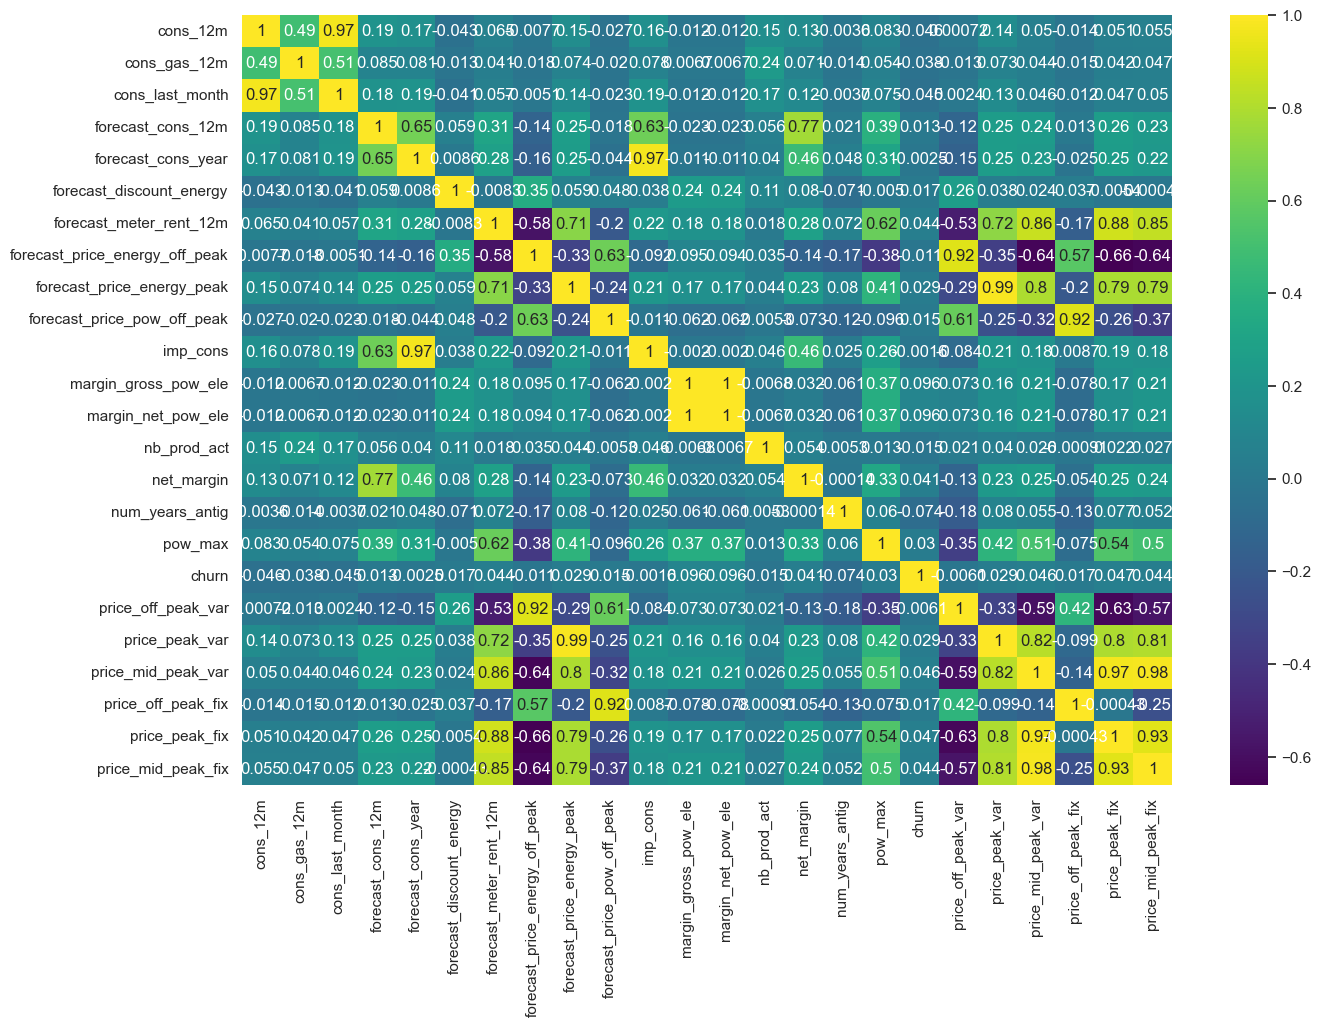

In [26]:
#Correlation analysis using Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(cpdf.corr(), cmap='viridis',annot = True)
plt.show();

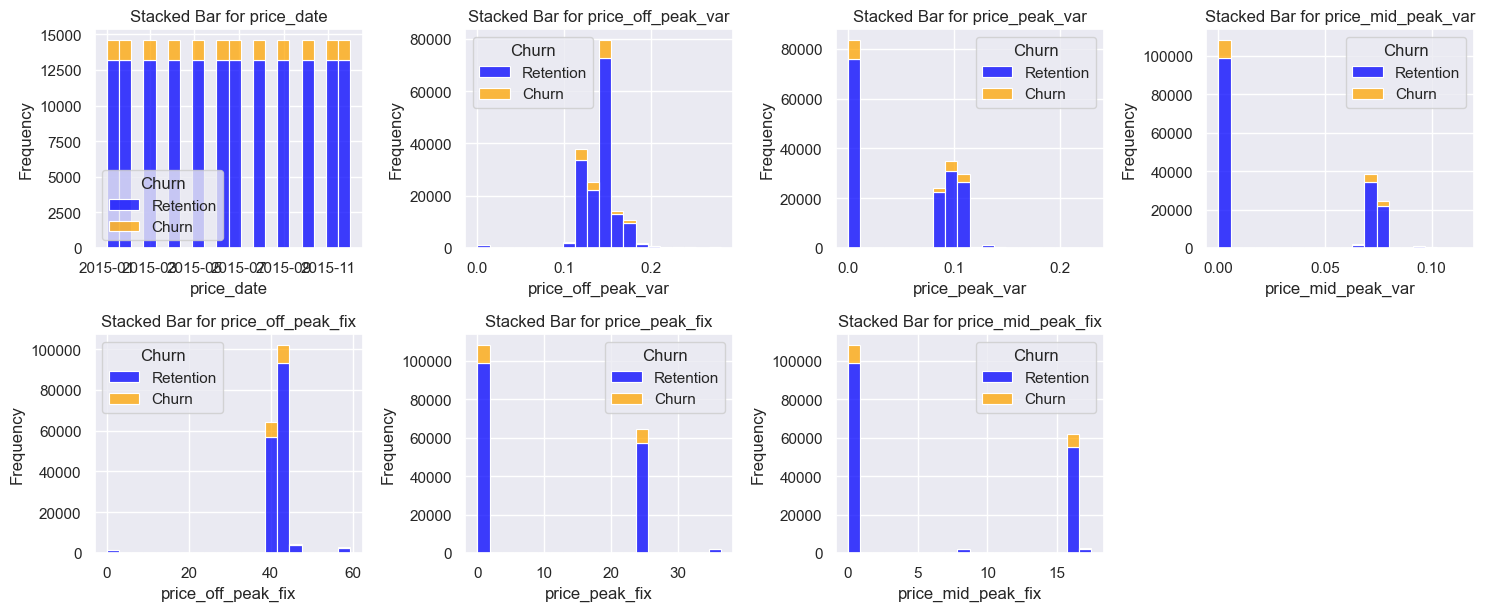

In [27]:
plt.figure(figsize=(15, 18))
for i, feature in enumerate(cpdf.columns[-7:]):  # Exclude the 'Churn' column
    plt.subplot(6, 4, i + 1)
    
    # Create a custom palette to reverse the default colors
    custom_palette = {0: 'blue', 1: 'orange'}
    sns.histplot(data=cpdf, x=feature, hue='churn', multiple= 'stack', bins=20, hue_order=[1, 0], palette= custom_palette)
    
    plt.title(f'Stacked Bar for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Churn', labels=['Retention', 'Churn'])
    
plt.tight_layout()
plt.show();

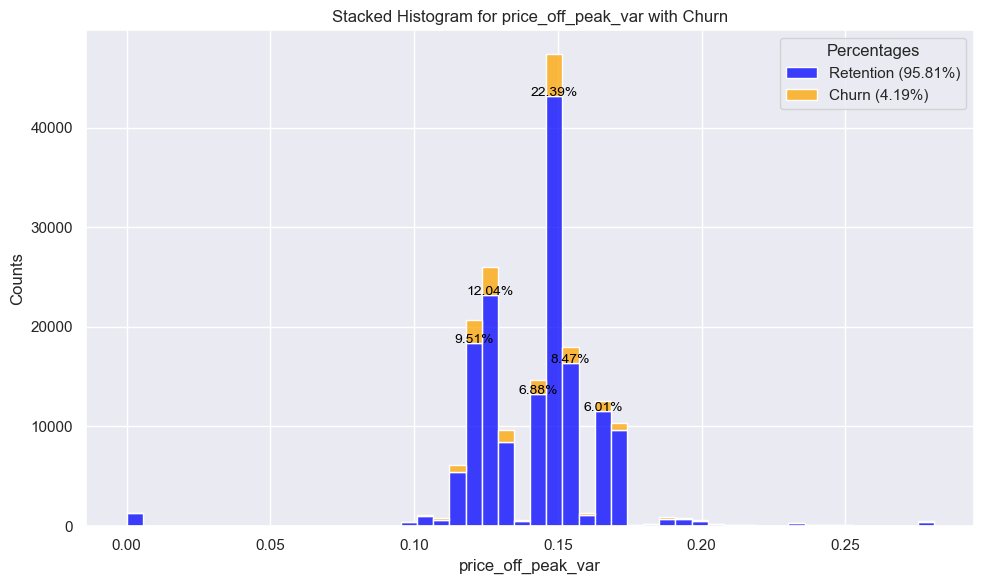

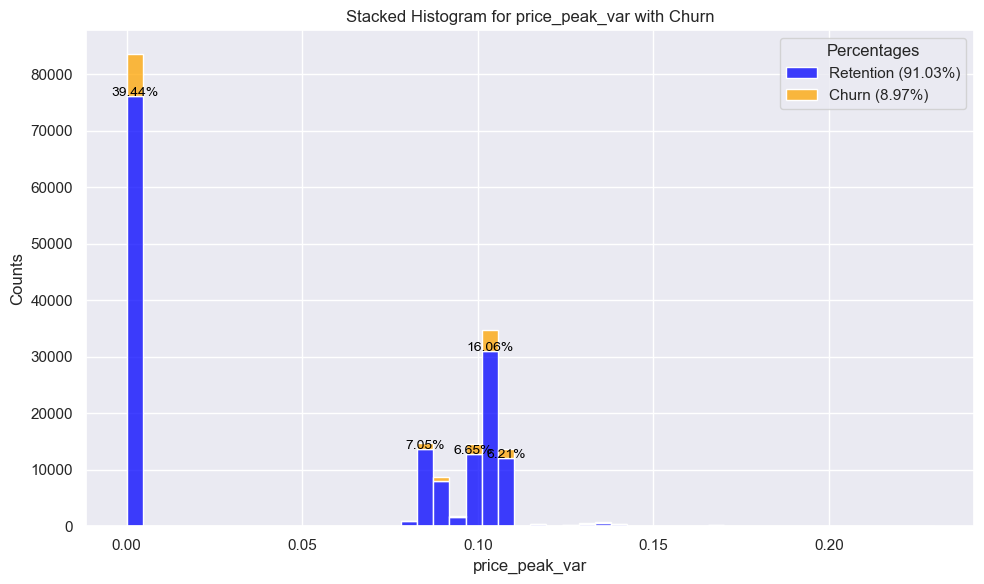

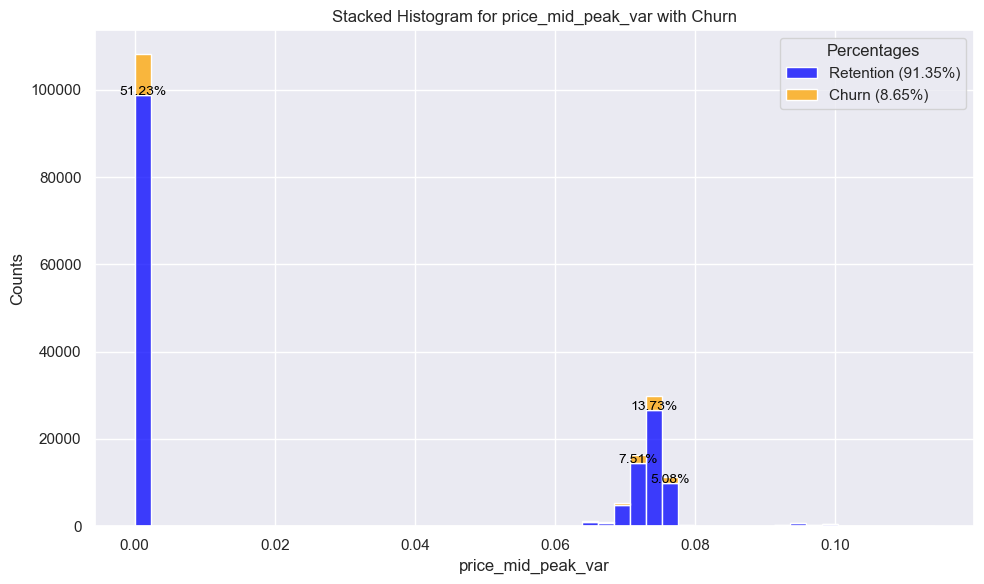

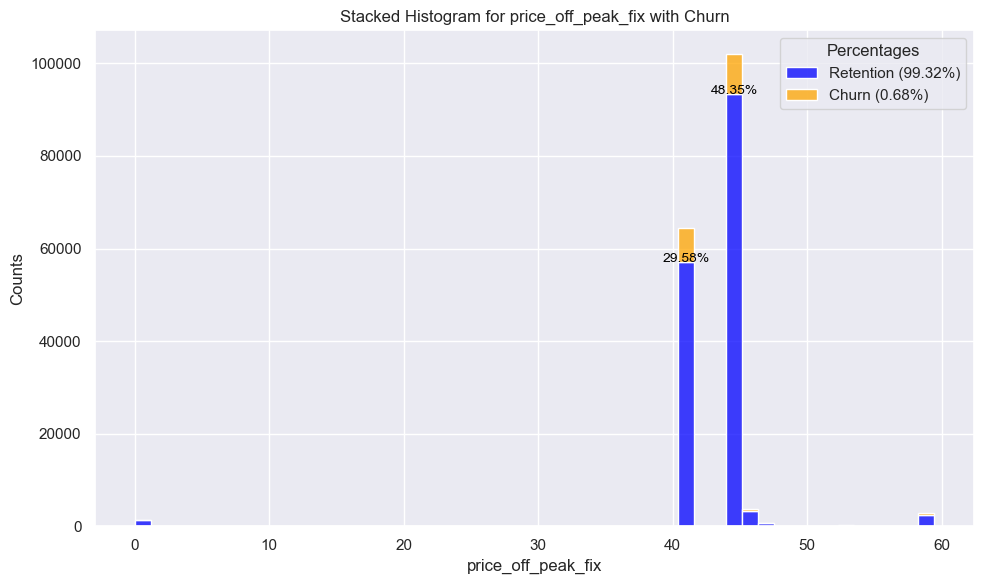

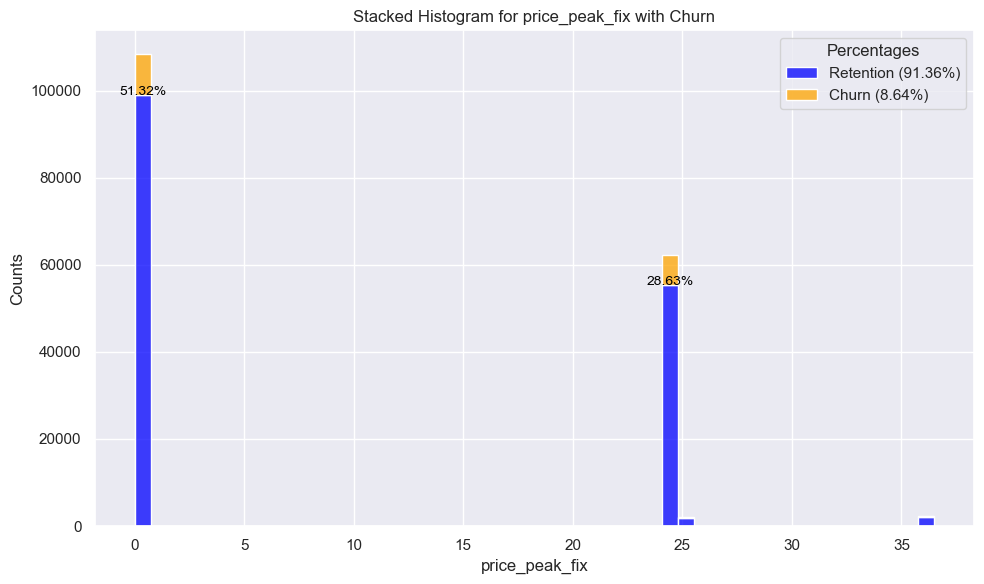

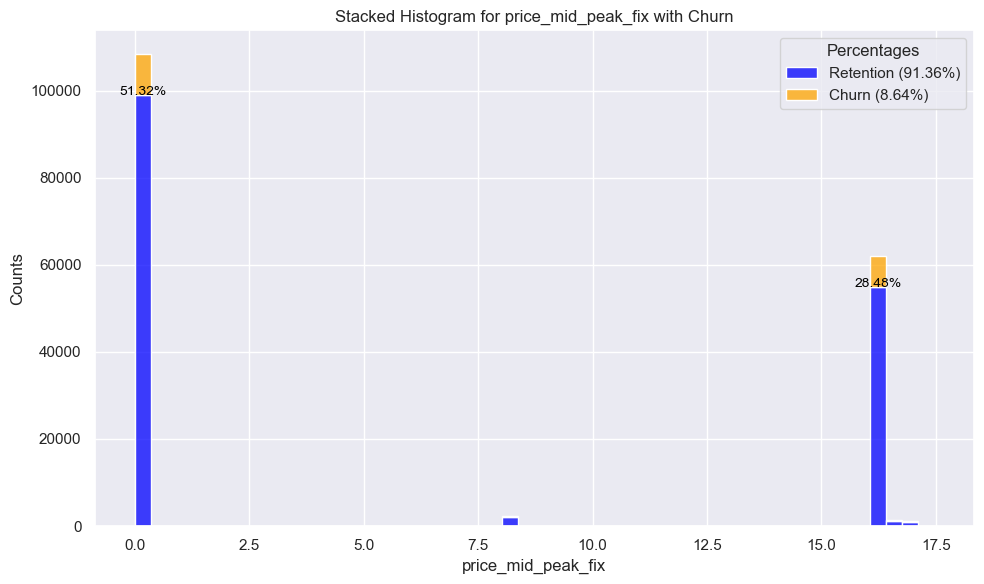

In [28]:
# Select the last 6 columns and add "churn" to the end
selected_columns = cpdf.columns[-6:].tolist()
selected_columns.append('churn')

# Create a new DataFrame with only the selected columns
subset_df = cpdf[selected_columns]

# Calculate total percentages of retention and churn
total_count = len(subset_df)
total_retention = (subset_df['churn'] == 0).sum()
total_churn = (subset_df['churn'] == 1).sum()

# Create a stacked bar chart for each column
for column in subset_df.columns[:-1]:  # Exclude the "churn" column
    plt.figure(figsize=(10, 6))  # Set the figure size before each plot
    custom_palette = {0: 'blue', 1: 'orange'}  # Set the color palette
    ax = sns.histplot(data=subset_df, x=column, hue='churn', multiple='stack', hue_order=[1, 0], bins=50, palette=custom_palette)

    plt.title(f'Stacked Histogram for {column} with Churn')
    plt.xlabel(column)
    plt.ylabel('Counts')

    # Calculate and display percentages for churn and retention
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total_count
        if percentage > 0.05:  # Annotate only if percentage is greater than 0.0%
            if p.get_facecolor() == custom_palette[0]:  # Check if the color is blue (Retention)
                ax.annotate(f'Retention: {percentage:.2%}', (p.get_x() + p.get_width() / 2., height / 2),
                            ha='center', va='baseline', fontsize=10, color='black')
            else:  
                if percentage > 0.05:
                        # Color is orange (Churn)
                    ax.annotate(f'{percentage:.2%}', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='baseline', fontsize=10, color='black')

    # Calculate percentages specific to the variable being plotted
    variable_retention = (subset_df.loc[subset_df[column] == 0, 'churn'] == 0).sum()
    variable_churn = (subset_df.loc[subset_df[column] == 0, 'churn'] == 1).sum()
    variable_total = variable_retention + variable_churn

    variable_retention_percentage = variable_retention / variable_total
    variable_churn_percentage = variable_churn / variable_total

    # Add the percentages specific to the variable to the legend
    legend_labels = [f'Retention ({variable_retention_percentage:.2%})', f'Churn ({variable_churn_percentage:.2%})']
    plt.legend(title='Percentages', labels=legend_labels, loc='upper right')
    
    plt.tight_layout()
    plt.show();

#### Observation: 
price_off_peak_var and price_off_peak_fix seem to have the least percentage effects of Churn. Remaining variables price_off_peak_fix, price_mid_peak_var, price_mid_peak_fix have high churn percentages. 

price_off_peak_var = least 4.19 (low)

#### price_peak_var = 8.97 (highest)
#### price_mid_peak_var = 8.65 (high) 

price_off_peak_fix= 0.68 (least)

#### price_peak_fix= 8.64 (high)
#### price_mid_peak_fix = 8.64 (high)

In [29]:
price =cpdf[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']]

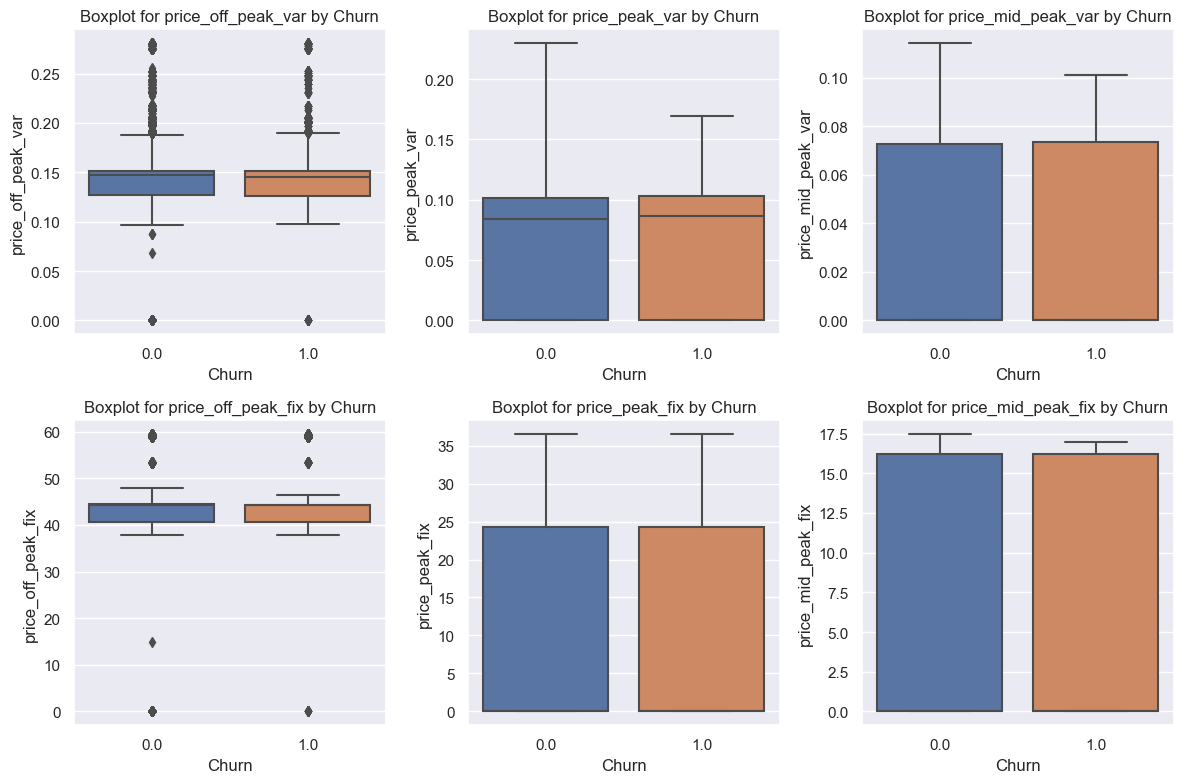

In [30]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(price.columns):
    plt.subplot(2, 3, i + 1)
    
    sns.boxplot(data=price, x=cpdf['churn'], y=column)
    
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show();

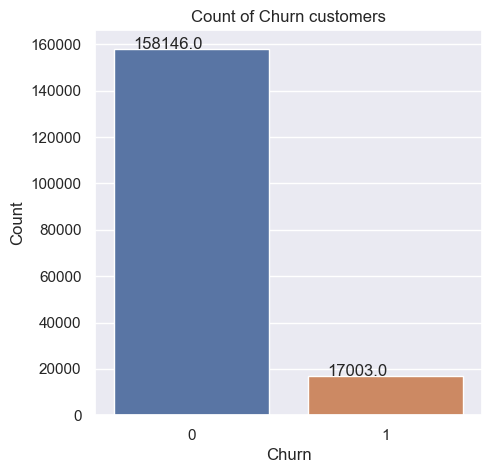

In [31]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="churn", data=cpdf, order=[0,1])
plt.title('Count of Churn customers')
plt.xlabel('Churn')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [32]:
import warnings

# Ignore all warnings (not recommended for production code)
warnings.filterwarnings("ignore")

# Ignore a specific type of warning (e.g., DeprecationWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Restore the default warning behavior (not recommended for production code)
warnings.filterwarnings("default")

C:\Users\honey\AppData\Local\Temp\ipykernel_13216\419908634.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=cpdf, x=cpdf['churn'], y=column, jitter=True, palette="husl")
C:\Users\honey\AppData\Local\Temp\ipykernel_13216\419908634.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=cpdf, x=cpdf['churn'], y=column, jitter=True, palette="husl")
C:\Users\honey\AppData\Local\Temp\ipykernel_13216\419908634.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=cpdf, x=cpdf['churn'], y=column, jitter=True, palette="husl")
C:\Users\honey\AppData\Local\Temp\ipykernel_13216\419908634.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=cpdf, x=cpdf['churn'], y=column, jitter=True, palette="husl")
C:\Users\honey\AppData\Local\Temp\ipykernel_13216\419908634.py:5: FutureWarning: Passing `palette` without assigning

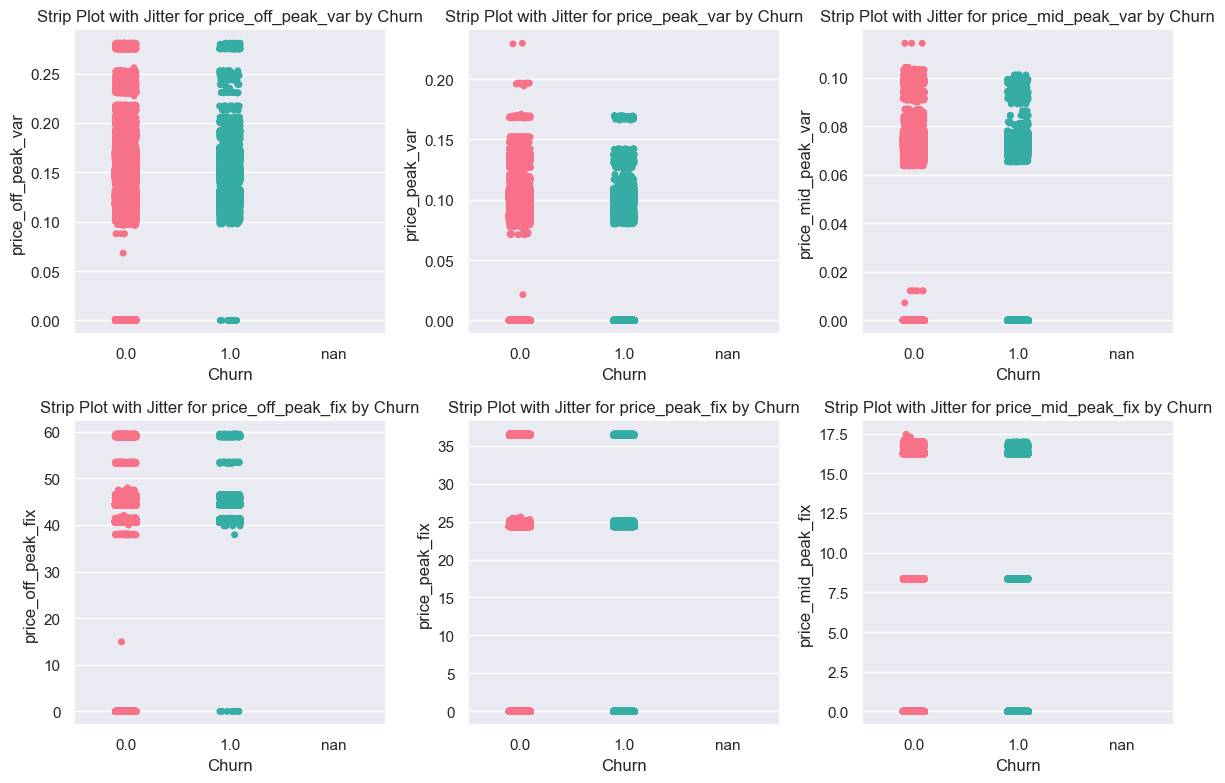

In [33]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(price.columns):
    plt.subplot(2, 3, i + 1)
    
    sns.stripplot(data=cpdf, x=cpdf['churn'], y=column, jitter=True, palette="husl")
    
    plt.title(f'Strip Plot with Jitter for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show();

In [34]:
X= cpdf.drop(['id'],axis=1)
y= cpdf['id']

In [35]:
X.shape

(193002, 30)

In [36]:
X.duplicated().sum()

14419

In [37]:
X.drop_duplicates(inplace= True)

In [38]:
X.duplicated().sum()

0

In [39]:
X.isnull().sum()

cons_12m                          3434
cons_gas_12m                      3434
cons_last_month                   3434
date_activ                        3434
date_end                          3434
date_modif_prod                   3434
date_renewal                      3434
forecast_cons_12m                 3434
forecast_cons_year                3434
forecast_discount_energy          3434
forecast_meter_rent_12m           3434
forecast_price_energy_off_peak    3434
forecast_price_energy_peak        3434
forecast_price_pow_off_peak       3434
has_gas                           3434
imp_cons                          3434
margin_gross_pow_ele              3434
margin_net_pow_ele                3434
nb_prod_act                       3434
net_margin                        3434
num_years_antig                   3434
pow_max                           3434
churn                             3434
price_date                           0
price_off_peak_var                   0
price_peak_var           

In [40]:
X.shape

(178583, 30)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178583 entries, 0 to 192999
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   cons_12m                        175149 non-null  float64       
 1   cons_gas_12m                    175149 non-null  float64       
 2   cons_last_month                 175149 non-null  float64       
 3   date_activ                      175149 non-null  datetime64[ns]
 4   date_end                        175149 non-null  datetime64[ns]
 5   date_modif_prod                 175149 non-null  datetime64[ns]
 6   date_renewal                    175149 non-null  datetime64[ns]
 7   forecast_cons_12m               175149 non-null  float64       
 8   forecast_cons_year              175149 non-null  float64       
 9   forecast_discount_energy        175149 non-null  float64       
 10  forecast_meter_rent_12m         175149 non-null  float64

##### Observation:
price_off_peak_var and price_off_peak_fix seem to have the least percentage effects of Churn. Remaining variables price_off_peak_fix, price_mid_peak_var, price_mid_peak_fix have high churn percentages.

price_off_peak_var = least 4.19 (low)

### price_peak_var = 8.97 (highest)
#### price_mid_peak_var = 8.65 (high)
price_off_peak_fix= 0.68 (least)
#### price_peak_fix= 8.64 (high)
#### price_mid_peak_fix = 8.64 (high)

We can notice that churn has been high during the periods where price was in its peak periods. However, after checking the data for price, we have noticed that price for energy and electricity has been significantly less during the peak periods compared to off peak periods. 
however, we shall check how much price has been offered to clients who have churned and not churned to confirm price sensitivity.

In [42]:
X.shape

(178583, 30)

In [43]:
X.dropna(axis=0, inplace= True)

In [44]:
X.shape

(175149, 30)

In [48]:
cpdf= pd.concat([X,y], axis=1)
cpdf.reset_index(drop=True, inplace=True)
cpdf.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'price_date',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'id'],
      dtype='object')

In [49]:
# Get the column names in a list
columns = cpdf.columns.tolist()
# Move the last column to the first position
new_order = [columns[-1]] + columns[:-1]
# Reorder the DataFrame columns
cpdf = cpdf[new_order]
# Display the updated DataFrame
cpdf.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'price_date',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [45]:
price_columns =cpdf[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']]

In [46]:
# Calculate the average for each "price" column
average_prices = price_columns =cpdf[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']].mean()

# Print the average prices
print(average_prices)

price_off_peak_var     0.141027
price_peak_var         0.054630
price_mid_peak_var     0.030496
price_off_peak_fix    43.334477
price_peak_fix        10.622875
price_mid_peak_fix     6.409984
dtype: float64


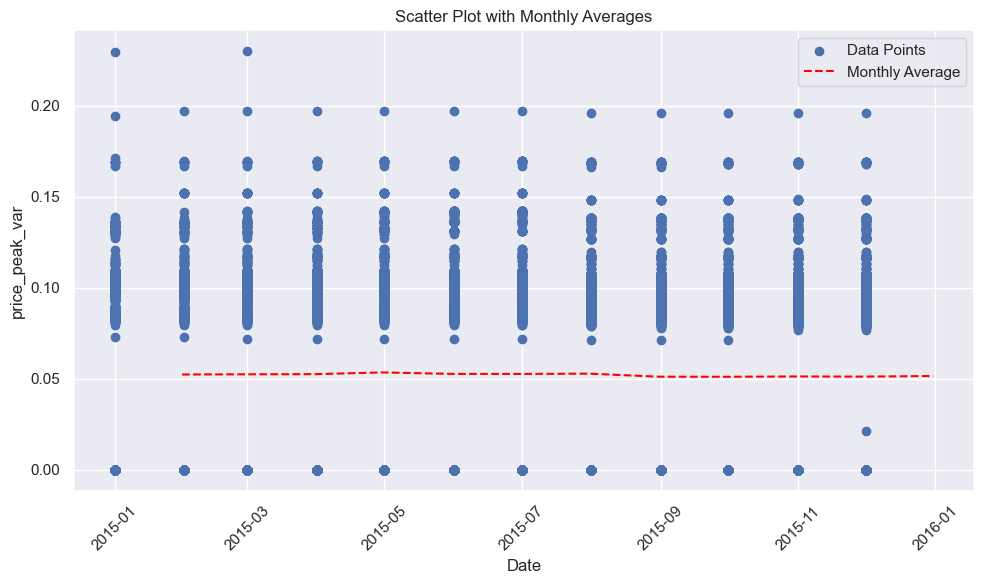

In [105]:
# Group the data by month and calculate the average for each month
monthly_avg = cpdf.groupby(cpdf['price_date'].dt.to_period('M'))['price_peak_var'].mean()

# Reset the index to make 'month' a column in the DataFrame
monthly_avg = monthly_avg.reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(cpdf['price_date'], cpdf['price_peak_var'], label='Data Points', marker='o')
plt.plot(monthly_avg['price_date'], monthly_avg['price_peak_var'], label='Monthly Average', color='red', linestyle='--')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('price_peak_var')
plt.title('Scatter Plot with Monthly Averages')
plt.grid(True)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show();

In [69]:
# Check if 'churn' column contains values other than 0 and 1
if cpdf['churn'].isin([0, 1]).all():
    print("The 'churn' column contains only values 0 and 1.")
else:
    print("The 'churn' column contains values other than 0 and 1.")

The 'churn' column contains values other than 0 and 1.


In [74]:
# Filter and print rows where 'churn' is not 0 or 1
invalid_churn_rows = cpdf[~cpdf['churn'].isin([0, 1])]
print("Rows with 'churn' values other than 0 and 1:")
len(invalid_churn_rows)

Rows with 'churn' values other than 0 and 1:


17853

In [75]:
# Find the indices of rows where 'churn' is not 0 or 1
invalid_churn_indices = cpdf[~cpdf['churn'].isin([0, 1])].index

# Drop the rows with invalid 'churn' values
cpdf = cpdf.drop(index=invalid_churn_indices)

# Reset the DataFrame index
cpdf.reset_index(drop=True, inplace=True)

In [76]:
if cpdf['churn'].isin([0, 1]).all():
    print("The 'churn' column contains only values 0 and 1.")
else:
    print("The 'churn' column contains values other than 0 and 1.")

The 'churn' column contains only values 0 and 1.


In [77]:
cpdf.shape

(175149, 31)

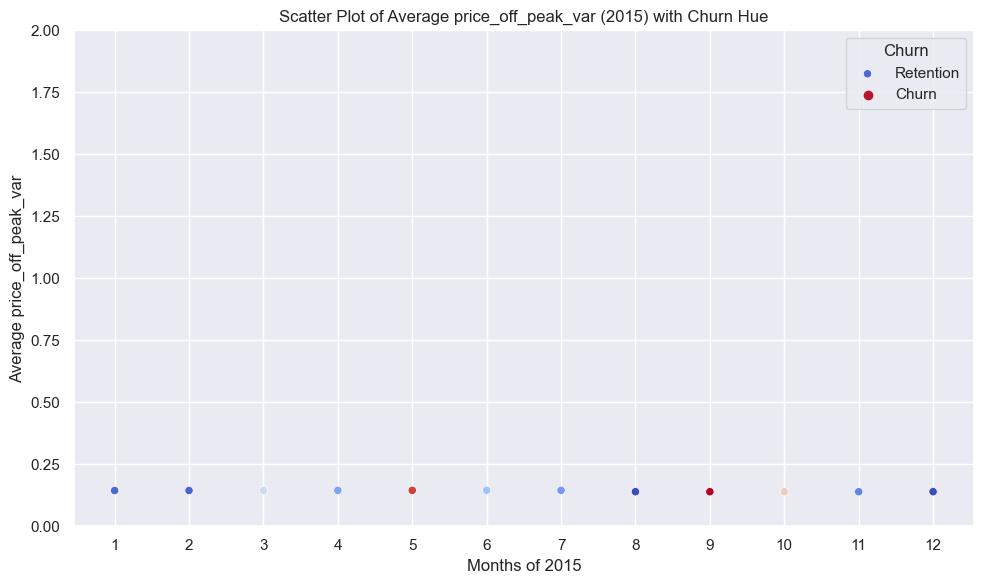

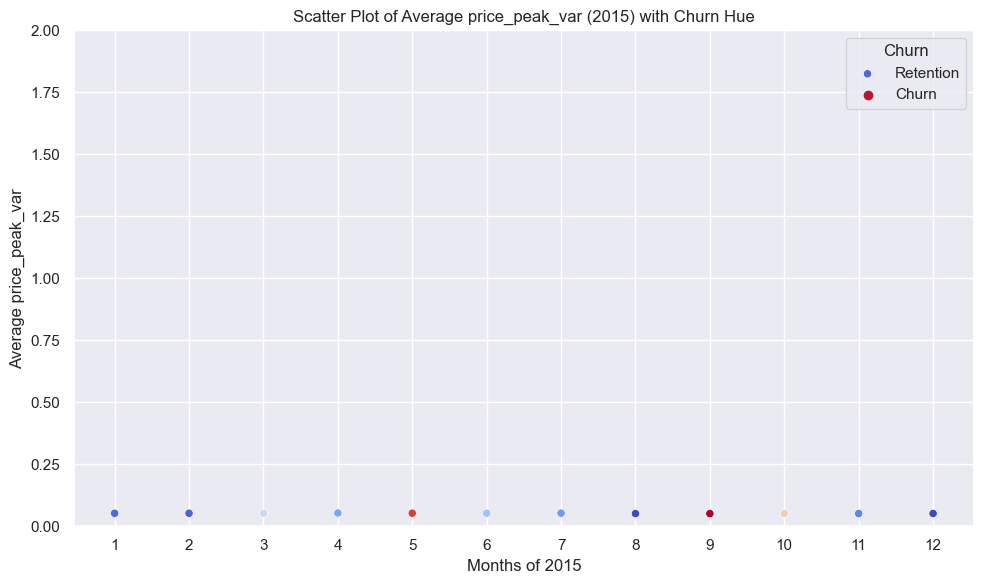

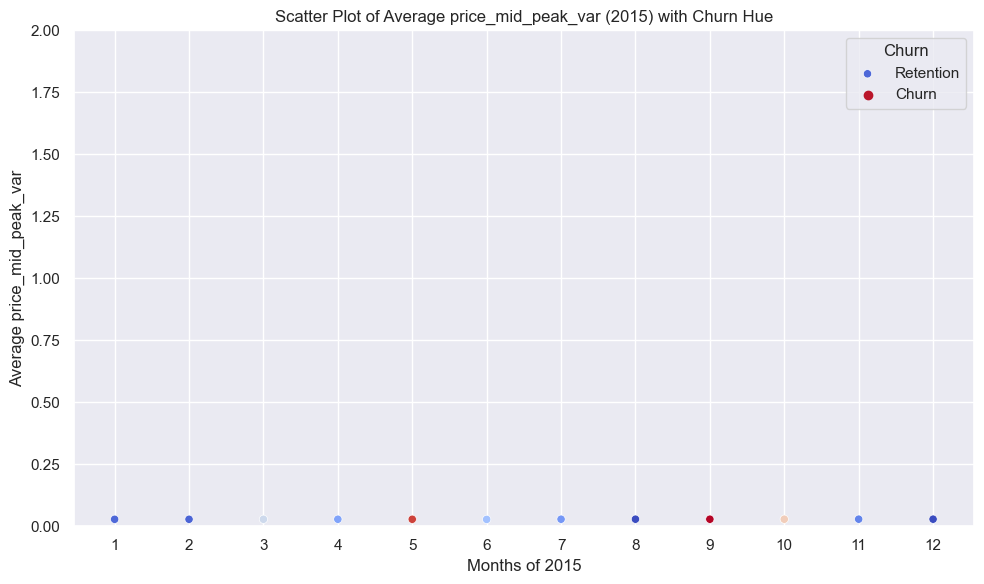

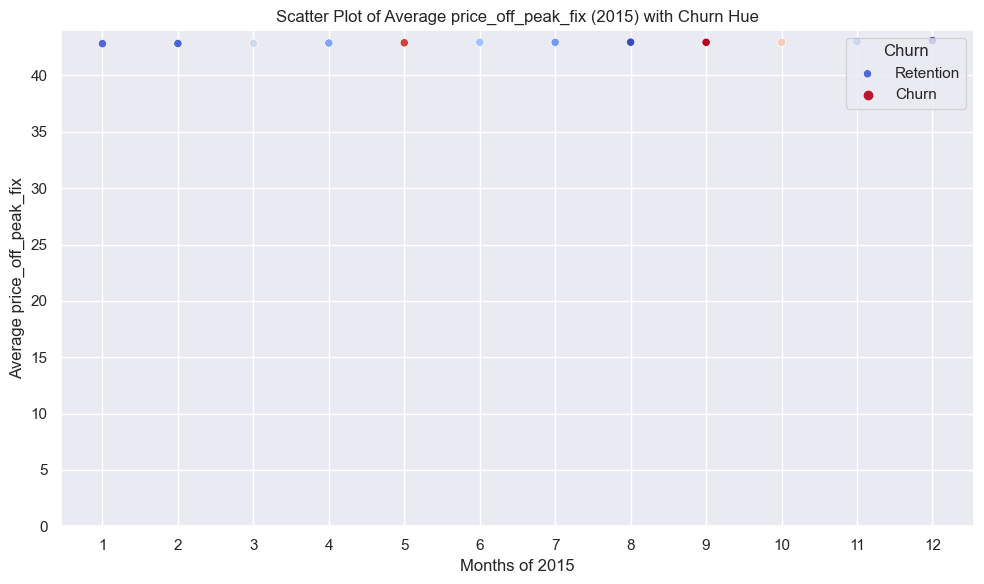

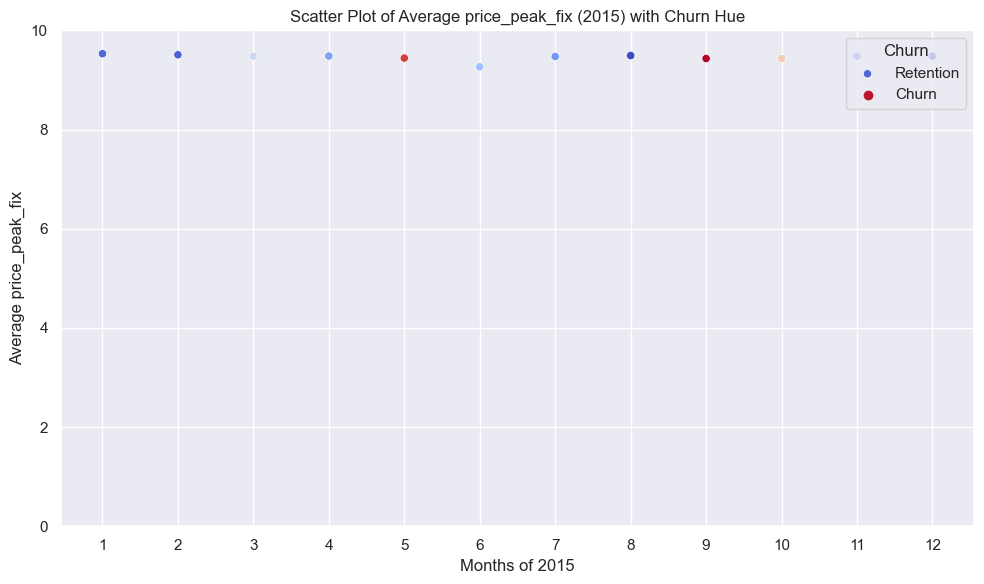

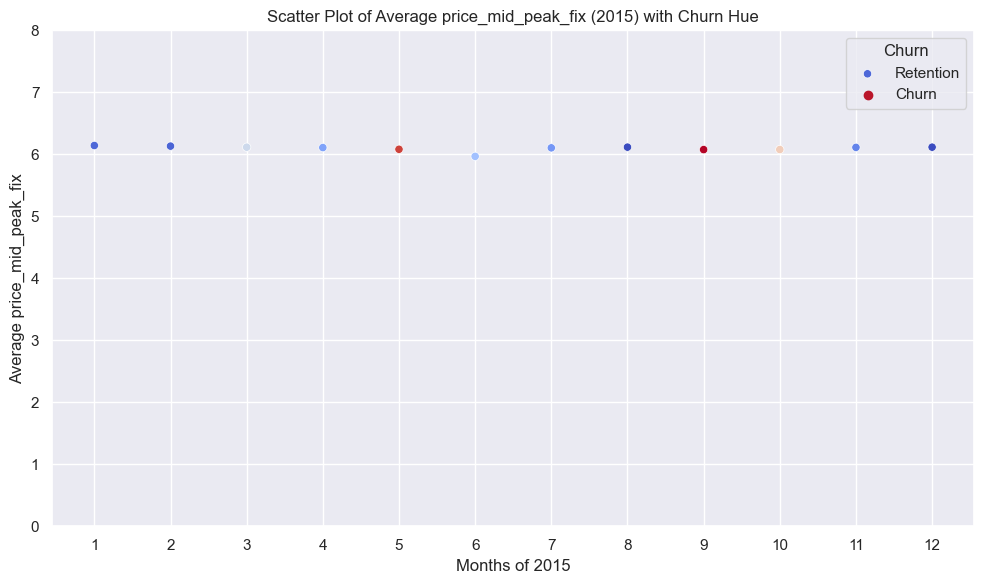

In [138]:
# Get the last 6 columns of the DataFrame
last_six_columns = cpdf.columns[-6:]

custom_palette = {0: 'blue', 1: 'orange'}
# Loop through the last 6 columns and create scatter plots with 'churn' as hue
for column in last_six_columns:
    # Group the data by month and calculate the average for the current column and 'churn'
    monthly_avg = cpdf.groupby(cpdf['price_date'].dt.month)[[column,'churn']].mean()
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.scatterplot(data=monthly_avg, x=monthly_avg.index,y=column, palette='coolwarm_r',hue_order=[1,0],hue='churn',marker='o')   
    # Customize the plot
    plt.xlabel('Months of 2015')
    plt.ylabel(f'Average {column}')
    plt.title(f'Scatter Plot of Average {column} (2015) with Churn Hue')
    plt.grid(True)
    plt.legend(title='Churn',loc='upper right', labels=['Retention', 'Churn'])
    # Set the y-axis limits to start from zero with a scale of 2
    plt.ylim(0, np.ceil(monthly_avg[column].max() / 2) * 2)
    plt.xticks(np.arange(1, 13))
    # Show the plot
    plt.tight_layout()
    plt.show();

In [117]:
# Get the last 6 columns of the DataFrame
last_six_columns = cpdf.columns[-6:]

# Loop through the last 6 columns and calculate the average price offered for both 'Churn' (0) and 'Retention' (1) grouped by months
for column in last_six_columns:
    # Group the data by month and calculate the average for the current column and 'churn'
    monthly_avg = cpdf.groupby([cpdf['price_date'].dt.month, 'churn'])[column].mean().unstack()
    
    # Print the average price offered for 'Churn' (0) and 'Retention' (1) grouped by months
    print(f'Column: {column}')
    print(monthly_avg)
    print()

Column: price_off_peak_var
churn            0.0       1.0
price_date                    
1           0.144004  0.143417
2           0.144204  0.143662
3           0.144420  0.143756
4           0.144519  0.144158
5           0.144756  0.144689
6           0.144936  0.145024
7           0.144959  0.144834
8           0.139324  0.138646
9           0.139327  0.138854
10          0.139316  0.138384
11          0.139335  0.138556
12          0.139433  0.138810

Column: price_peak_var
churn            0.0       1.0
price_date                    
1           0.051809  0.056989
2           0.051916  0.056931
3           0.051981  0.057281
4           0.052942  0.058077
5           0.052141  0.057344
6           0.052145  0.057149
7           0.052299  0.057206
8           0.050633  0.055488
9           0.050597  0.055395
10          0.050772  0.055438
11          0.050689  0.055407
12          0.050982  0.055948

Column: price_mid_peak_var
churn            0.0       1.0
price_date            

#### As we can see from the series, the average price offered to customers who churned in price_peak_var is 0.054 points higher than the price offered to customers who have not churned. 
There is a slight price rise which might be the reason why customers have churned. 
#### This is also true for price_mid_peak_var where the prices offered to retained customers has a difference of 0.302. And also for pice_peak_fix (difference of 2) and price_mid_peak_fix(1.35).
We can also verify this, after comparing to prices in during offpeak for both electricity and energy, yes, the given average price seem too high for off peak, however, customers have churned on those rates too. 

#### Therefore, we can to an extent think, that price sensitiviity exists. There is a slight variation in prices, and prices offered to customers could be leading to more churn than retention. Simply seeing the price rates during peak and off peak periods gives the impression that customers have been charged low, or given reasonable rates. However, the real picture speaks when we examine deeper and check the actual rates offered to customers who have churned. 